<a href="https://colab.research.google.com/github/SumathiGit/Defect-Detection-Food-Package/blob/main/Defect_Detection_Food_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_zip_path = '/content/drive/My Drive/Defect_Detection_Dataset/Img/Defect_Detection_Img.zip'

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
from PIL import Image

In [ ]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall("Files")
zip_ref.close()

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Defect_Detection_Dataset/Anno/food.csv")

In [ ]:
df.head()

,filename,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bottle,Label1_Bread,Label1_CAKE,Label1_CORN,Label1_Candy,Label1_Cans,Label1_Cashews,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label1_Cocktail,Label1_CoolDrinks,Label1_Dates,Label1_DriedMango,Label1_Drinks,Label1_Fish,Label1_Flakes,Label1_Flour,Label1_FoodPack,Label1_Honey,Label1_JAM,Label1_Meat,Label1_MilkDrink,Label1_Muffins,Label1_Mushroom,Label1_NUTS,Label1_Noodles,Label1_PackedFood,Label1_Paprika,Label1_Pasta,Label1_Peanuts,Label1_Pistachios,Label1_RICE,Label1_SODA,Label1_SUGAR,...,Label2_OilDefected,Label2_OilPerfect,Label2_PackedFoodDefected,Label2_PackedFoodPerfect,Label2_Paprika Defected,Label2_PaprikaPerfect,Label2_PastaDefected,Label2_PastaPerfect,Label2_PeanutsDefected,Label2_PeanutsPerfect,Label2_PistachiosDefected,Label2_PistachiosPerfect,Label2_RiceDefected,Label2_RicePerfect,Label2_SaltDefected,Label2_SaltPerfect,Label2_SauceDefected,Label2_SaucePerfect,Label2_SeedsDefected,Label2_SeedsPerfect,Label2_SnackDefected,Label2_SnackPerfect,Label2_SodaDefected,Label2_SodaPerfect,Label2_SoySauceDefected,Label2_SoySaucePerfect,Label2_SpicesDefected,Label2_SpicesPerfect,Label2_SugarDefected,Label2_SugarPerfect,Label2_TeaBagsDefected,Label2_TeaBagsPerfect,Label2_ToothPastePerfect,Label2_ToothpasteDefected,Label2_VinegarDefected,Label2_VinegarPerfect,Label2_WaferDefected,Label2_WaferPerfect,Defected,Non_Defected
0,6930096350922_camera0-1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,6930096350922_camera3-11.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6921168593736_camera1-7.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,6921168593736_camera0-32.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6930096350922_camera0-23.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.set_index("filename", drop = True)

In [ ]:
df.head()

,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bottle,Label1_Bread,Label1_CAKE,Label1_CORN,Label1_Candy,Label1_Cans,Label1_Cashews,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label1_Cocktail,Label1_CoolDrinks,Label1_Dates,Label1_DriedMango,Label1_Drinks,Label1_Fish,Label1_Flakes,Label1_Flour,Label1_FoodPack,Label1_Honey,Label1_JAM,Label1_Meat,Label1_MilkDrink,Label1_Muffins,Label1_Mushroom,Label1_NUTS,Label1_Noodles,Label1_PackedFood,Label1_Paprika,Label1_Pasta,Label1_Peanuts,Label1_Pistachios,Label1_RICE,Label1_SODA,Label1_SUGAR,Label1_Salt,...,Label2_OilDefected,Label2_OilPerfect,Label2_PackedFoodDefected,Label2_PackedFoodPerfect,Label2_Paprika Defected,Label2_PaprikaPerfect,Label2_PastaDefected,Label2_PastaPerfect,Label2_PeanutsDefected,Label2_PeanutsPerfect,Label2_PistachiosDefected,Label2_PistachiosPerfect,Label2_RiceDefected,Label2_RicePerfect,Label2_SaltDefected,Label2_SaltPerfect,Label2_SauceDefected,Label2_SaucePerfect,Label2_SeedsDefected,Label2_SeedsPerfect,Label2_SnackDefected,Label2_SnackPerfect,Label2_SodaDefected,Label2_SodaPerfect,Label2_SoySauceDefected,Label2_SoySaucePerfect,Label2_SpicesDefected,Label2_SpicesPerfect,Label2_SugarDefected,Label2_SugarPerfect,Label2_TeaBagsDefected,Label2_TeaBagsPerfect,Label2_ToothPastePerfect,Label2_ToothpasteDefected,Label2_VinegarDefected,Label2_VinegarPerfect,Label2_WaferDefected,Label2_WaferPerfect,Defected,Non_Defected
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6930096350922_camera0-1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6930096350922_camera3-11.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6921168593736_camera1-7.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6921168593736_camera0-32.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6930096350922_camera0-23.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.index

Index(['6930096350922_camera0-1.jpg', '6930096350922_camera3-11.jpg',
       '6921168593736_camera1-7.jpg', '6921168593736_camera0-32.jpg',
       '6930096350922_camera0-23.jpg', '6921168593736_camera3-31.jpg',
       '6921168593736_camera0-17.jpg', '6921168593736_camera1-33.jpg',
       '6921168593736_camera1-32.jpg', '6930096350922_camera2-40.jpg',
       ...
       'CEREAL0249.jpg', 'CEREAL0023.jpg', 'CEREAL0225.jpg', 'CEREAL0257.jpg',
       'CEREAL0274.jpg', 'CEREAL0010.jpg', 'CEREAL0098.jpg', 'CEREAL0224.jpg',
       'CEREAL0013.jpg', 'CEREAL0254.jpg'],
      dtype='object', name='filename', length=7624)

In [ ]:
from glob import glob

In [ ]:
Image.open('Files/Beans/BeansDefected/6926892501033_camera1-8.jpg').convert("RGB")

In [ ]:
files = glob('Files/**/*.jpg', recursive=True)

In [ ]:
print(files)

['Files/Vinegar/VinegarPerfect/VINEGAR0088.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0108.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0078.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0139.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0015.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0133.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0042.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0132.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0075.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0094.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0073.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0090.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0093.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0080.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0097.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0074.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0145.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0077.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0038.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR0107.jpg', 'Files/Vinegar/VinegarPerfect/VINEGAR01

In [ ]:
len(files)

7624

In [ ]:
np.random.seed(0) 

In [ ]:
shuffle = np.random.permutation(len(files))

In [ ]:
len(shuffle)

7624

In [ ]:
len(shuffle)*0.3

2287.2

In [ ]:
max(shuffle)

7623

In [ ]:
for i in ['train', 'valid']:
    try:

      os.mkdir(os.path.join('/tmp/', i))
    except:
        pass

In [ ]:
!ls /tmp/

dap_multiplexer.6cb24861392f.root.log.INFO.20210707-073918.52
dap_multiplexer.INFO
debugger_20iz1sdbcx
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
tmpef1y0kc5
train
valid


In [ ]:
files[10].split('/')[-1]

'VINEGAR0073.jpg'

In [ ]:
((np.array(df[df.index==files[10].split('/')[-1]]))).shape

(1, 152)

In [ ]:
from tqdm import tqdm

In [ ]:
print(type(shuffle))

<class 'numpy.ndarray'>


In [ ]:
#!rm -Rf /tmp/valid/

In [ ]:
#!mkdir /tmp/valid

In [ ]:
!ls -ltr /tmp/

total 232
lrwxrwxrwx 1 root root     61 Jul  7 04:01 dap_multiplexer.INFO -> dap_multiplexer.7f5e4844e3a9.root.log.INFO.20210707-040147.51
srwxr-xr-x 1 root root      0 Jul  7 04:01 debugger_1zwjq9m243
drwx------ 2 root root   4096 Jul  7 04:01 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root   1436 Jul  7 04:01 dap_multiplexer.7f5e4844e3a9.root.log.INFO.20210707-040147.51
drwx------ 2 root root   4096 Jul  7 04:04 tmpc80iqkoc
srw------- 1 root root      0 Jul  7 04:04 drivefs_ipc.0
srw------- 1 root root      0 Jul  7 04:04 drivefs_ipc.0_shell
drwxr-xr-x 2 root root 217088 Jul  7 04:50 train
drwxr-xr-x 2 root root   4096 Jul  7 05:15 valid


In [ ]:
import time

In [ ]:
valid_dict = {}
valid_file_names = []
#count = 0
for i in tqdm(shuffle[:2287]):
    file_name = files[i].split('/')[-1]
    print(file_name)
    labels = np.array(df[df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/valid', file_name))
    #time.sleep(10)
    #count = count + 1
    #print(count)
    #print("******************************************")

In [ ]:
print(valid_file_names)
print(len(valid_file_names))

['6920731700205_camera0-26.jpg', 'PASTA0094.jpg', '6901844710114_camera0-37.jpg', '6950361040808_camera3-26.jpg', 'HONEY0018.jpg', '6920152439005_camera3-23.jpg', '6911567886393_camera1-10.jpg', 'CORN0007.jpg', 'FISH0005.jpg', 'CEREAL0069.jpg', '6940188803618_camera0-39.jpg', '6953029710112_camera2-32.jpg', '6942836705435_camera1-36.jpg', 'CAKE0007.jpg', 'CEREAL0094.jpg', '6907777820708-back_camera3-27.jpg', '6953042700206_camera0-27.jpg', '6953787800117_camera3-8.jpg', '6914782114371-back_camera1-15.jpg', '6922848642133_camera1-28.jpg', '6923450605981-back_camera2-9.jpg', '6914782114371-back_camera3-18.jpg', 'RICE0143.jpg', '6907777820708-back_camera1-8.jpg', 'JAM0043.jpg', '6907777822948_camera0-20.jpg', 'CAKE0031.jpg', '6953787800124_camera2-24.jpg', '6924882486100_camera0-9.jpg', '6940188803618_camera1-1.jpg', 'CEREAL0012.jpg', '6953787800117_camera1-3.jpg', 'CHIPS0074.jpg', '6922848642133_camera0-23.jpg', 'VINEGAR0058.jpg', 'CEREAL0173.jpg', '6920731700205_camera1-39.jpg', '695378

In [ ]:
filename_1 = valid_file_names
print("List Before ", filename_1)
temp_list = []

for i in filename_1:
    if i not in temp_list:
        temp_list.append(i)

filename_1 = temp_list

print("List After removing duplicates ", filename_1)
len(filename_1)

List Before  ['6920731700205_camera0-26.jpg', 'PASTA0094.jpg', '6901844710114_camera0-37.jpg', '6950361040808_camera3-26.jpg', 'HONEY0018.jpg', '6920152439005_camera3-23.jpg', '6911567886393_camera1-10.jpg', 'CORN0007.jpg', 'FISH0005.jpg', 'CEREAL0069.jpg', '6940188803618_camera0-39.jpg', '6953029710112_camera2-32.jpg', '6942836705435_camera1-36.jpg', 'CAKE0007.jpg', 'CEREAL0094.jpg', '6907777820708-back_camera3-27.jpg', '6953042700206_camera0-27.jpg', '6953787800117_camera3-8.jpg', '6914782114371-back_camera1-15.jpg', '6922848642133_camera1-28.jpg', '6923450605981-back_camera2-9.jpg', '6914782114371-back_camera3-18.jpg', 'RICE0143.jpg', '6907777820708-back_camera1-8.jpg', 'JAM0043.jpg', '6907777822948_camera0-20.jpg', 'CAKE0031.jpg', '6953787800124_camera2-24.jpg', '6924882486100_camera0-9.jpg', '6940188803618_camera1-1.jpg', 'CEREAL0012.jpg', '6953787800117_camera1-3.jpg', 'CHIPS0074.jpg', '6922848642133_camera0-23.jpg', 'VINEGAR0058.jpg', 'CEREAL0173.jpg', '6920731700205_camera1-39.

2180

In [ ]:
#!ls -ltr /tmp/valid

In [ ]:
# import os, fnmatch
# filename1 = fnmatch.filter(os.listdir('/tmp/valid/'), '*.jpg')
# print(filename1)
# print(len(filename1))

['CAKE0011.jpg', 'FISH0067.jpg', '6953042700220_camera1-28.jpg', 'TOMATO_SAUCE0074.jpg', 'FISH0091.jpg', 'CAKE0003.jpg', '6920152400975_camera2-34.jpg', 'RICE0014.jpg', '6920152439005_camera1-23.jpg', '6940737300148_camera0-37.jpg', 'HONEY0135.jpg', '6914973607125_camera1-5.jpg', '6921168593736_camera3-13.jpg', 'VINEGAR0040.jpg', 'CEREAL0240.jpg', '6924743921436_camera0-4.jpg', '6924187828964_camera1-34.jpg', '6907777820708-back_camera0-40.jpg', 'HONEY0010.jpg', '6950361040808_camera2-20.jpg', 'FISH0044.jpg', 'CORN0026.jpg', '6935145301030_camera3-18.jpg', '6924743913721_camera1-1.jpg', '6941543400251_camera0-12.jpg', 'RICE0041.jpg', '6935145301030_camera0-39.jpg', 'CAKE0123.jpg', '6922848642133_camera3-6.jpg', '6907777820708-back_camera3-40.jpg', 'FISH0014.jpg', 'CEREAL0247.jpg', 'CEREAL0052.jpg', 'SODA0123.jpg', '6953787800117_camera0-6.jpg', '6928804011456_camera0-27.jpg', 'JAM0066.jpg', '6921168593736_camera3-31.jpg', 'CEREAL0141.jpg', 'PASTA0167.jpg', '6902227014843_camera0-3.jpg'

In [ ]:
# from collections import Counter
# a = valid_file_names
# b = filename1

# c1 = Counter(a)
# c2 = Counter(b)
# diff = list((Counter(a) - Counter(b)).elements())
# print(diff)
# print(len(diff))

['6953787800117_camera0-9.jpg', 'JAM0078.jpg', '6907777825963-back_camera0-14.jpg', '6907777800519_camera2-1.jpg', 'VINEGAR0054.jpg', '6950361040808_camera1-8.jpg', '6921168593576_camera0-1.jpg', '6901070600128_camera2-1.jpg', 'JAM0032.jpg', '6907777820708_camera2-15.jpg', '6935145301030_camera1-4.jpg', '6940737300148_camera3-39.jpg', '6948960100078_camera2-40.jpg', 'CEREAL0240.jpg', '6940188803618_camera2-23.jpg', '6920731700205_camera0-40.jpg', '6922848642133_camera1-34.jpg', '6907777820708_camera2-22.jpg', '6953787800124_camera2-2.jpg', '6940737300148_camera1-9.jpg', '6928804010220_camera2-40.jpg', '6921168593576_camera3-12.jpg', '6901844710114_camera2-21.jpg', '6939947700169_camera3-40.jpg', '6907777821811_camera3-30.jpg', '6935145301030_camera3-15.jpg', '6907777821811-back_camera0-3.jpg', '6911316380271_camera3-5.jpg', '4891028707851_camera1-25.jpg', 'SODA0119.jpg', 'HONEY0039.jpg', '6940188803618_camera3-30.jpg', '6931958014105_camera3-11.jpg', '6928804010114_camera1-1.jpg', 'TOM

In [ ]:
# l1 = valid_file_names
# l2=diff
# diff_list1_list2 = list(set(l1) - set(l2))
# diff_list2_list1 = list(set(l2) - set(l1))
# ttl_diff = diff_list1_list2 + diff_list2_list1
# print(ttl_diff)
# print(len(ttl_diff))

['6914973607125_camera0-1.jpg', '6924187828964-back_camera0-26.jpg', '6950361040808_camera3-17.jpg', '6920152485095_camera1-23.jpg', '6940188803618_camera3-19.jpg', '6907777820708-back_camera3-31.jpg', 'CEREAL0194.jpg', '6914782114371_camera1-1.jpg', '6923450605981-back_camera2-29.jpg', '6935145301030_camera0-8.jpg', 'CAKE0063.jpg', '6907777821903_camera0-11.jpg', 'CORN0090.jpg', '6940737300148_camera2-14.jpg', 'JAM0128.jpg', '6914973608306~A~back_camera2-2.jpg', '038900004095_camera0-32.jpg', '6923450605981-back_camera3-20.jpg', 'CAKE0016.jpg', '6926265301024_camera1-40.jpg', 'SODA0038.jpg', 'FISH0096.jpg', '6907777821811-back_camera2-33.jpg', 'TOMATO_SAUCE0045.jpg', 'JAM0218.jpg', 'TOMATO_SAUCE0119.jpg', 'RICE0118.jpg', '6907777821811-back_camera1-21.jpg', '6907777821811-back_camera1-1.jpg', 'TOMATO_SAUCE0130.jpg', 'RICE0064.jpg', '6928804011326_camera0-40.jpg', '6922848642133_camera3-6.jpg', '6953787800124_camera0-24.jpg', '4894375013507_camera2-29.jpg', 'JAM0151.jpg', '692689250103

In [ ]:
print(file_name)

JAM0022.jpg


In [ ]:
print(glob('/tmp/valid/*.jpg'))

['/tmp/valid/6924187828964-back_camera2-18.jpg', '/tmp/valid/4800009004827_camera0-11.jpg', '/tmp/valid/CEREAL0263.jpg', '/tmp/valid/6950361040808_camera0-9.jpg', '/tmp/valid/CEREAL0189.jpg', '/tmp/valid/6935145301047_camera1-31.jpg', '/tmp/valid/6923450605981-back_camera1-27.jpg', '/tmp/valid/6911567886393_camera3-27.jpg', '/tmp/valid/6956367338680_camera0-24.jpg', '/tmp/valid/8993175540629_camera3-15.jpg', '/tmp/valid/6935145301030_camera3-27.jpg', '/tmp/valid/6935145301030_camera3-6.jpg', '/tmp/valid/CAKE0078.jpg', '/tmp/valid/6923450603550_camera0-35.jpg', '/tmp/valid/6953787800117_camera2-34.jpg', '/tmp/valid/FISH0018.jpg', '/tmp/valid/FISH0003.jpg', '/tmp/valid/6926892562003_camera2-12.jpg', '/tmp/valid/VINEGAR0108.jpg', '/tmp/valid/TOMATO_SAUCE0075.jpg', '/tmp/valid/6907777821811_camera0-38.jpg', '/tmp/valid/SODA0142.jpg', '/tmp/valid/RICE0142.jpg', '/tmp/valid/6902227014829-back_camera1-39.jpg', '/tmp/valid/6940737300148_camera2-8.jpg', '/tmp/valid/SODA0166.jpg', '/tmp/valid/69

In [ ]:
print(type('/tmp/valid/*.jpg'))

<class 'str'>


In [ ]:
len(glob('/tmp/valid/*.jpg'))

2180

In [ ]:
valid_df = pd.DataFrame(valid_dict.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:
valid_df

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
2175,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2177,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2178,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
len(valid_df.columns)

1

In [ ]:
valid_df.index = filename_1

In [ ]:
valid_df.head()

,0
6920731700205_camera0-26.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
PASTA0094.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6901844710114_camera0-37.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6950361040808_camera3-26.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
HONEY0018.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
valid_df.columns = ['labels']

In [ ]:
print(labels)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]]


In [ ]:
train_dict = {}
train_file_names = []
for i in tqdm(shuffle[2300:]):
    file_name = files[i].split('/')[-1]
    labels = np.array(df[df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/train', file_name))

100%|██████████| 5324/5324 [00:03<00:00, 1404.02it/s]


In [ ]:
print(train_file_names)
print(len(train_file_names))

['CHIPS0148.jpg', 'HONEY0099.jpg', '6920152485095_camera2-26.jpg', 'TOMATO_SAUCE0057.jpg', '6920152485095-back_camera2-1.jpg', 'VINEGAR0056.jpg', '6901070600128_camera2-10.jpg', 'JAM0212.jpg', '6949352201106_camera3-11.jpg', 'VINEGAR0140.jpg', '6907777821811-back_camera1-19.jpg', '6907777821811_camera2-11.jpg', '69019388_camera3-35.jpg', '6911316380288_camera1-1.jpg', '6928804011326_camera1-1.jpg', '6921168593736_camera1-7.jpg', 'TOMATO_SAUCE0023.jpg', 'TOMATO_SAUCE0141 (copy).jpg', '6935145301030_camera3-10.jpg', '6917878035284-back_camera1-31.jpg', '6907777821811-back_camera2-7.jpg', '6907777821811_camera3-9.jpg', '6942836705435_camera3-18.jpg', '6907777821811-back_camera2-23.jpg', '6907992510446_camera1-4.jpg', 'PASTA0103.jpg', '6939947700169_camera1-32.jpg', '6935145301030_camera1-30.jpg', '6921168593736_camera1-30.jpg', '6926892562096_camera2-40.jpg', 'RICE0103.jpg', '6924743921436_camera1-23.jpg', '6907777821903_camera3-27.jpg', 'SUGAR0045.jpg', 'PASTA0139.jpg', 'NUTS0151.jpg', '

In [ ]:
filename_2 = train_file_names
print("List Before ", filename_2)
temp_list = []

for i in filename_2:
    if i not in temp_list:
        temp_list.append(i)

filename_2 = temp_list

print("List After removing duplicates ", filename_2)
len(filename_2)

List Before  ['CHIPS0148.jpg', 'HONEY0099.jpg', '6920152485095_camera2-26.jpg', 'TOMATO_SAUCE0057.jpg', '6920152485095-back_camera2-1.jpg', 'VINEGAR0056.jpg', '6901070600128_camera2-10.jpg', 'JAM0212.jpg', '6949352201106_camera3-11.jpg', 'VINEGAR0140.jpg', '6907777821811-back_camera1-19.jpg', '6907777821811_camera2-11.jpg', '69019388_camera3-35.jpg', '6911316380288_camera1-1.jpg', '6928804011326_camera1-1.jpg', '6921168593736_camera1-7.jpg', 'TOMATO_SAUCE0023.jpg', 'TOMATO_SAUCE0141 (copy).jpg', '6935145301030_camera3-10.jpg', '6917878035284-back_camera1-31.jpg', '6907777821811-back_camera2-7.jpg', '6907777821811_camera3-9.jpg', '6942836705435_camera3-18.jpg', '6907777821811-back_camera2-23.jpg', '6907992510446_camera1-4.jpg', 'PASTA0103.jpg', '6939947700169_camera1-32.jpg', '6935145301030_camera1-30.jpg', '6921168593736_camera1-30.jpg', '6926892562096_camera2-40.jpg', 'RICE0103.jpg', '6924743921436_camera1-23.jpg', '6907777821903_camera3-27.jpg', 'SUGAR0045.jpg', 'PASTA0139.jpg', 'NUT

4680

In [ ]:
len(train_dict)

4680

In [ ]:
train_df = pd.DataFrame(train_dict.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:
train_df.head()

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
train_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
train_df.index.values

array([   0,    1,    2, ..., 4677, 4678, 4679])

In [ ]:
train_df.index = filename_2

In [ ]:
train_df.columns = ['labels']

In [ ]:
"""Generating Batches and Training """

'Generating Batches and Training '

In [ ]:
import torchvision
from glob import glob
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
%matplotlib inline

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class MultiClassFoodPackage(Dataset):
    
    def __init__(self, dataframe, folder_dir, transform = None):
        
        self.dataframe = dataframe
        self.folder_dir = folder_dir
        self.transform = transform
        self.file_names = dataframe.index
        self.labels = dataframe.labels.values.tolist()
        
        
    def __len__(self):
        return len(self.dataframe)
    
    
    def __getitem__(self, index):
        
        image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
        label = self.labels[index][0]
        sample = {'image': image, 'label': label.astype(float)}
        if self.transform:
            image = self.transform(sample['image'])
            sample = {'image': image, 'label': label.astype(float)}
        
        return sample

In [ ]:
tfms = transforms.Compose([transforms.Resize((256, 256)),
                           transforms.ToTensor()])

In [ ]:
train_dl = MultiClassFoodPackage(train_df, '/tmp/train/', transform = tfms)

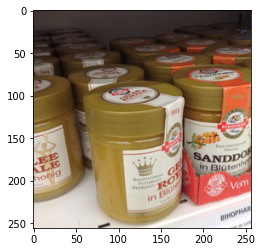

In [ ]:
plt.imshow(torchvision.utils.make_grid(train_dl[1]['image']).permute(1, 2, 0))

In [ ]:
(train_dl[1]['label'].astype(float))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
df.columns

Index(['Label1_Beans', 'Label1_Beverage', 'Label1_Biscuits', 'Label1_Bottle',
       'Label1_Bread', 'Label1_CAKE', 'Label1_CORN', 'Label1_Candy',
       'Label1_Cans', 'Label1_Cashews',
       ...
       'Label2_TeaBagsDefected', 'Label2_TeaBagsPerfect',
       'Label2_ToothPastePerfect', 'Label2_ToothpasteDefected',
       'Label2_VinegarDefected', 'Label2_VinegarPerfect',
       'Label2_WaferDefected', 'Label2_WaferPerfect', 'Defected',
       'Non_Defected'],
      dtype='object', length=152)

In [ ]:
valid_dl = MultiClassFoodPackage(valid_df, '/tmp/valid/', transform = tfms)

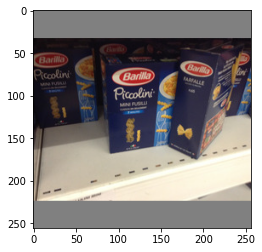

In [ ]:
plt.imshow(torchvision.utils.make_grid(valid_dl[1]['image']).permute(1,2,0))

In [ ]:
valid_dl[1]['label']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
import torch.nn.functional as F

In [ ]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3), # 3, 256, 256
            nn.MaxPool2d(2), # op: 16, 127, 127
            nn.ReLU(), # op: 64, 127, 127
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # 64, 127, 127   
            nn.MaxPool2d(2), #op: 128, 63, 63
            nn.ReLU() # op: 128, 63, 63
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3), # 128, 63, 63
            nn.MaxPool2d(2), #op: 256, 30, 30
            nn.ReLU() #op: 256, 30, 30
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3), # 256, 30, 30
            nn.MaxPool2d(2), #op: 512, 14, 14
            nn.ReLU(), #op: 512, 14, 14
            nn.Dropout(0.2)
        )
        self.Linear1 = nn.Linear(512 * 14 * 14, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, 152)
        
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return F.sigmoid(x)

In [ ]:
def check_cuda():
    _cuda = False
    if torch.cuda.is_available():
        _cuda = True
    return _cuda

In [ ]:
is_cuda = check_cuda()

In [ ]:
model = MultiClassifier()
if is_cuda:
    model.cuda()

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 64, num_workers = 2)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 64, num_workers = 2)

In [ ]:
"""Evaluating our model based on how many correct labels our model in able to predict 
and summing the number of correct label predictions for every image to and 
then dividing it by the number of labels.""" 

In [ ]:
def pred_acc(original, predicted):
    return torch.round(predicted).eq(original).sum().numpy()/len(original)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
from pprint import pprint

In [ ]:
def fit_model(epochs, model, dataloader, phase = 'training', volatile = False):
    
    pprint("Epoch: {}".format(epochs))

    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        volatile = True
        
    running_loss = []
    running_acc = []
    b = 0
    for i, data in enumerate(dataloader):
        

        inputs, target = data['image'].cuda(), data['label'].float().cuda()
        
        inputs, target = Variable(inputs), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
            
        ops = model(inputs)
        
        acc_ = []
        for i, d in enumerate(ops, 0):
           
            acc = pred_acc(torch.Tensor.cpu(target[i]), torch.Tensor.cpu(d))
            acc_.append(acc)

        loss = criterion(ops, target)
                
        running_loss.append(loss.item())
        running_acc.append(np.asarray(acc_).mean())
        b += 1
       
        if phase == 'training':
            
            loss.backward()
        
            optimizer.step()
            
    total_batch_loss = np.asarray(running_loss).mean()
    total_batch_acc = np.asarray(running_acc).mean()
    

    pprint("{} loss is {} ".format(phase,total_batch_loss))
    pprint("{} accuracy is {} ".format(phase, total_batch_acc))
    
    return total_batch_loss, total_batch_acc

In [ ]:
trn_losses = []; trn_acc = []
val_losses = []; val_acc = []
for i in tqdm(range(1, 50)):
    trn_l, trn_a = fit_model(i, model, train_dataloader)
    val_l, val_a = fit_model(i, model, valid_dataloader, phase = 'validation')
    trn_losses.append(trn_l); trn_acc.append(trn_a)
    val_losses.append(val_l); val_acc.append(val_a)

  0%|          | 0/49 [00:00<?, ?it/s]

'Epoch: 1'


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


'training loss is 0.688509263702341 '
'training accuracy is 0.5763080103129444 '
'Epoch: 1'


  2%|▏         | 1/49 [04:36<3:41:19, 276.66s/it]

'validation loss is 0.6851757066590446 '
'validation accuracy is 0.6266594219924814 '
'Epoch: 2'
'training loss is 0.6802979208327629 '
'training accuracy is 0.6980963282361309 '
'Epoch: 2'


  4%|▍         | 2/49 [09:11<3:36:14, 276.05s/it]

'validation loss is 0.6736421057156154 '
'validation accuracy is 0.8058094454887218 '
'Epoch: 3'
'training loss is 0.6566959667850185 '
'training accuracy is 0.8679959770625889 '
'Epoch: 3'


  6%|▌         | 3/49 [13:47<3:31:36, 276.00s/it]

'validation loss is 0.6236516645976475 '
'validation accuracy is 0.9094161184210526 '
'Epoch: 4'
'training loss is 0.43364248605998784 '
'training accuracy is 0.9343258245910385 '
'Epoch: 4'


  8%|▊         | 4/49 [18:23<3:27:10, 276.23s/it]

'validation loss is 0.1256669689502035 '
'validation accuracy is 0.9789414943609024 '
'Epoch: 5'
'training loss is 0.08249296036523741 '
'training accuracy is 0.9848987042140822 '
'Epoch: 5'


 10%|█         | 5/49 [22:56<3:21:49, 275.22s/it]

'validation loss is 0.07599151177065713 '
'validation accuracy is 0.984985902255639 '
'Epoch: 6'
'training loss is 0.07356692246488623 '
'training accuracy is 0.9851779205192033 '
'Epoch: 6'


 12%|█▏        | 6/49 [27:31<3:17:06, 275.05s/it]

'validation loss is 0.07329343472208295 '
'validation accuracy is 0.984985902255639 '
'Epoch: 7'
'training loss is 0.07182210965736492 '
'training accuracy is 0.9851779205192033 '
'Epoch: 7'


 14%|█▍        | 7/49 [32:04<3:12:03, 274.36s/it]

'validation loss is 0.07216575145721435 '
'validation accuracy is 0.984985902255639 '
'Epoch: 8'
'training loss is 0.07100063109317341 '
'training accuracy is 0.9851584726173539 '
'Epoch: 8'


 16%|█▋        | 8/49 [36:39<3:07:39, 274.61s/it]

'validation loss is 0.07161851759467806 '
'validation accuracy is 0.984985902255639 '
'Epoch: 9'
'training loss is 0.07069229676916793 '
'training accuracy is 0.9851195768136555 '
'Epoch: 9'


 18%|█▊        | 9/49 [41:12<3:02:46, 274.15s/it]

'validation loss is 0.07103567314999444 '
'validation accuracy is 0.984985902255639 '
'Epoch: 10'
'training loss is 0.07008916517165867 '
'training accuracy is 0.9851973684210525 '
'Epoch: 10'


 20%|██        | 10/49 [45:48<2:58:33, 274.71s/it]

'validation loss is 0.07141039073467255 '
'validation accuracy is 0.9848096804511278 '
'Epoch: 11'
'training loss is 0.07009511310103778 '
'training accuracy is 0.9851779205192033 '
'Epoch: 11'


 22%|██▏       | 11/49 [50:23<2:54:06, 274.90s/it]

'validation loss is 0.0708052682025092 '
'validation accuracy is 0.984985902255639 '
'Epoch: 12'
'training loss is 0.06999342163672319 '
'training accuracy is 0.9851584726173541 '
'Epoch: 12'


 24%|██▍       | 12/49 [54:58<2:49:28, 274.83s/it]

'validation loss is 0.07119689221893039 '
'validation accuracy is 0.9848096804511278 '
'Epoch: 13'
'training loss is 0.06994467268924455 '
'training accuracy is 0.9851584726173539 '
'Epoch: 13'


 27%|██▋       | 13/49 [59:33<2:44:55, 274.87s/it]

'validation loss is 0.07090689220598766 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 14'
'training loss is 0.06978865128916663 '
'training accuracy is 0.9851973684210525 '
'Epoch: 14'


 29%|██▊       | 14/49 [1:04:07<2:40:06, 274.48s/it]

'validation loss is 0.07072679762329374 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 15'
'training loss is 0.06971394371342014 '
'training accuracy is 0.9851973684210525 '
'Epoch: 15'


 31%|███       | 15/49 [1:08:43<2:35:47, 274.94s/it]

'validation loss is 0.0706691922886031 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 16'
'training loss is 0.06970317238891446 '
'training accuracy is 0.9851973684210524 '
'Epoch: 16'


 33%|███▎      | 16/49 [1:13:17<2:31:08, 274.79s/it]

'validation loss is 0.07048795052937099 '
'validation accuracy is 0.984985902255639 '
'Epoch: 17'
'training loss is 0.0696839353925473 '
'training accuracy is 0.9851779205192033 '
'Epoch: 17'


 35%|███▍      | 17/49 [1:17:53<2:26:47, 275.23s/it]

'validation loss is 0.07074708789587021 '
'validation accuracy is 0.984985902255639 '
'Epoch: 18'
'training loss is 0.06967702215990505 '
'training accuracy is 0.9851779205192033 '
'Epoch: 18'


 37%|███▋      | 18/49 [1:22:28<2:22:03, 274.96s/it]

'validation loss is 0.07047940450055258 '
'validation accuracy is 0.984985902255639 '
'Epoch: 19'
'training loss is 0.06961336158014633 '
'training accuracy is 0.9851779205192033 '
'Epoch: 19'


 39%|███▉      | 19/49 [1:27:01<2:17:18, 274.62s/it]

'validation loss is 0.07037825009652547 '
'validation accuracy is 0.984985902255639 '
'Epoch: 20'
'training loss is 0.06956744626969905 '
'training accuracy is 0.9851973684210525 '
'Epoch: 20'


 41%|████      | 20/49 [1:31:37<2:12:50, 274.85s/it]

'validation loss is 0.07057260040725981 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 21'
'training loss is 0.06961391010397189 '
'training accuracy is 0.9851779205192035 '
'Epoch: 21'


 43%|████▎     | 21/49 [1:36:12<2:08:17, 274.91s/it]

'validation loss is 0.07088462518794196 '
'validation accuracy is 0.9848096804511276 '
'Epoch: 22'
'training loss is 0.06955761220809575 '
'training accuracy is 0.9851779205192033 '
'Epoch: 22'


 45%|████▍     | 22/49 [1:40:45<2:03:24, 274.26s/it]

'validation loss is 0.07032096769128526 '
'validation accuracy is 0.984985902255639 '
'Epoch: 23'
'training loss is 0.0696125487620766 '
'training accuracy is 0.9851584726173539 '
'Epoch: 23'


 47%|████▋     | 23/49 [1:45:22<1:59:15, 275.20s/it]

'validation loss is 0.07064677881343025 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 24'
'training loss is 0.06955289870903299 '
'training accuracy is 0.9851390247155046 '
'Epoch: 24'


 49%|████▉     | 24/49 [1:49:58<1:54:47, 275.51s/it]

'validation loss is 0.07052563237292427 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 25'
'training loss is 0.06957614764168456 '
'training accuracy is 0.9851584726173539 '
'Epoch: 25'


 51%|█████     | 25/49 [1:54:32<1:50:00, 275.02s/it]

'validation loss is 0.07066097259521484 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 26'
'training loss is 0.0694536258642738 '
'training accuracy is 0.9851779205192033 '
'Epoch: 26'


 53%|█████▎    | 26/49 [1:59:10<1:45:42, 275.74s/it]

'validation loss is 0.0704657141651426 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 27'
'training loss is 0.06950952314041756 '
'training accuracy is 0.9851584726173539 '
'Epoch: 27'


 55%|█████▌    | 27/49 [2:03:50<1:41:38, 277.19s/it]

'validation loss is 0.07014358331050191 '
'validation accuracy is 0.984985902255639 '
'Epoch: 28'
'training loss is 0.06943329393460944 '
'training accuracy is 0.9851779205192033 '
'Epoch: 28'


 57%|█████▋    | 28/49 [2:08:28<1:37:07, 277.49s/it]

'validation loss is 0.07008800602384976 '
'validation accuracy is 0.984985902255639 '
'Epoch: 29'
'training loss is 0.06937503532783405 '
'training accuracy is 0.9851584726173539 '
'Epoch: 29'


 59%|█████▉    | 29/49 [2:13:09<1:32:46, 278.32s/it]

'validation loss is 0.07046650988715035 '
'validation accuracy is 0.984985902255639 '
'Epoch: 30'
'training loss is 0.06936632710936907 '
'training accuracy is 0.9851973684210525 '
'Epoch: 30'


 61%|██████    | 30/49 [2:17:45<1:27:56, 277.69s/it]

'validation loss is 0.0702259783233915 '
'validation accuracy is 0.984985902255639 '
'Epoch: 31'
'training loss is 0.06933282265389287 '
'training accuracy is 0.985177920519203 '
'Epoch: 31'


 63%|██████▎   | 31/49 [2:22:22<1:23:16, 277.56s/it]

'validation loss is 0.07029075345822743 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 32'
'training loss is 0.06932945871675336 '
'training accuracy is 0.9851779205192033 '
'Epoch: 32'


 65%|██████▌   | 32/49 [2:27:00<1:18:42, 277.80s/it]

'validation loss is 0.06999612780553954 '
'validation accuracy is 0.984985902255639 '
'Epoch: 33'
'training loss is 0.06930247915757669 '
'training accuracy is 0.9851973684210524 '
'Epoch: 33'


 67%|██████▋   | 33/49 [2:31:37<1:13:59, 277.47s/it]

'validation loss is 0.07027654967137746 '
'validation accuracy is 0.984985902255639 '
'Epoch: 34'
'training loss is 0.06941545945969788 '
'training accuracy is 0.9851584726173539 '
'Epoch: 34'


 69%|██████▉   | 34/49 [2:36:16<1:09:27, 277.81s/it]

'validation loss is 0.07026498296431133 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 35'
'training loss is 0.06939536604929615 '
'training accuracy is 0.9851390247155046 '
'Epoch: 35'


 71%|███████▏  | 35/49 [2:40:53<1:04:46, 277.57s/it]

'validation loss is 0.07021485481943403 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 36'
'training loss is 0.06926763168460615 '
'training accuracy is 0.985177920519203 '
'Epoch: 36'


 73%|███████▎  | 36/49 [2:45:30<1:00:08, 277.60s/it]

'validation loss is 0.07056456208229064 '
'validation accuracy is 0.9848096804511278 '
'Epoch: 37'
'training loss is 0.06924432697328362 '
'training accuracy is 0.9851779205192033 '
'Epoch: 37'


 76%|███████▌  | 37/49 [2:50:07<55:27, 277.29s/it]  

'validation loss is 0.07030892585005079 '
'validation accuracy is 0.9849859022556388 '
'Epoch: 38'
'training loss is 0.06927721625244296 '
'training accuracy is 0.9851584726173539 '
'Epoch: 38'


 78%|███████▊  | 38/49 [2:54:42<50:44, 276.74s/it]

'validation loss is 0.07010251326220376 '
'validation accuracy is 0.984985902255639 '
'Epoch: 39'
'training loss is 0.06922266863890596 '
'training accuracy is 0.9851779205192033 '
'Epoch: 39'


 80%|███████▉  | 39/49 [2:59:19<46:07, 276.72s/it]

'validation loss is 0.0701165822999818 '
'validation accuracy is 0.9848977913533834 '
'Epoch: 40'
'training loss is 0.0692048253038445 '
'training accuracy is 0.985177920519203 '
'Epoch: 40'


 82%|████████▏ | 40/49 [3:03:55<41:29, 276.60s/it]

'validation loss is 0.0699724589075361 '
'validation accuracy is 0.9849859022556391 '
'Epoch: 41'
'training loss is 0.06915851783108067 '
'training accuracy is 0.9851779205192033 '
'Epoch: 41'


 84%|████████▎ | 41/49 [3:08:31<36:50, 276.31s/it]

'validation loss is 0.07014994706426347 '
'validation accuracy is 0.9848977913533832 '
'Epoch: 42'
'training loss is 0.06917655669354103 '
'training accuracy is 0.985177920519203 '
'Epoch: 42'


 86%|████████▌ | 42/49 [3:13:09<32:16, 276.70s/it]

'validation loss is 0.06993620416947774 '
'validation accuracy is 0.9849859022556391 '
'Epoch: 43'
'training loss is 0.06933125380325962 '
'training accuracy is 0.9851001289118063 '
'Epoch: 43'


 88%|████████▊ | 43/49 [3:17:47<27:42, 277.16s/it]

'validation loss is 0.06996091880968638 '
'validation accuracy is 0.984985902255639 '
'Epoch: 44'
'training loss is 0.06905124487506377 '
'training accuracy is 0.9851973684210524 '
'Epoch: 44'


 90%|████████▉ | 44/49 [3:22:25<23:06, 277.37s/it]

'validation loss is 0.07002470727477755 '
'validation accuracy is 0.9849859022556391 '
'Epoch: 45'
'training loss is 0.06909728120710398 '
'training accuracy is 0.9851973684210525 '
'Epoch: 45'


 92%|█████████▏| 45/49 [3:27:04<18:32, 278.07s/it]

'validation loss is 0.06998159204210554 '
'validation accuracy is 0.9849859022556388 '
'Epoch: 46'
'training loss is 0.06908712737463615 '
'training accuracy is 0.9851779205192033 '
'Epoch: 46'


 94%|█████████▍| 46/49 [3:31:43<13:54, 278.30s/it]

'validation loss is 0.07029814336981093 '
'validation accuracy is 0.9848096804511278 '
'Epoch: 47'
'training loss is 0.06908421882906475 '
'training accuracy is 0.985177920519203 '
'Epoch: 47'


 96%|█████████▌| 47/49 [3:36:25<09:18, 279.43s/it]

'validation loss is 0.07007403267281397 '
'validation accuracy is 0.984985902255639 '
'Epoch: 48'
'training loss is 0.06903383065317129 '
'training accuracy is 0.9851973684210525 '
'Epoch: 48'


 98%|█████████▊| 48/49 [3:41:04<04:39, 279.10s/it]

'validation loss is 0.06991515436342784 '
'validation accuracy is 0.9849859022556388 '
'Epoch: 49'
'training loss is 0.06910088336145556 '
'training accuracy is 0.9851584726173539 '
'Epoch: 49'


100%|██████████| 49/49 [3:45:48<00:00, 276.50s/it]

'validation loss is 0.07009594993931907 '
'validation accuracy is 0.9848977913533832 '


In [ ]:
torch.save(model, "/content/drive/My Drive/Defect_Detection_Dataset/Defect_Detection_Model_50_Epochs")

In [ ]:
import matplotlib.pyplot as plt

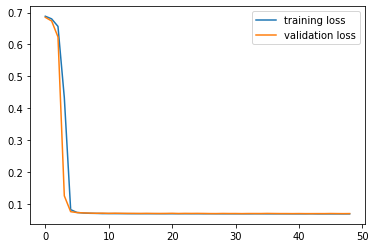

In [ ]:
plt.plot(trn_losses, label='training loss')
plt.plot(val_losses,label='validation loss')
plt.legend()

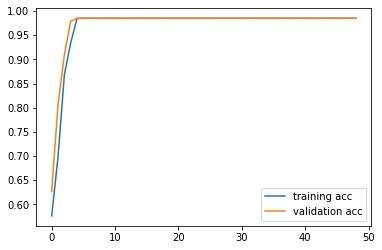

In [ ]:
plt.plot(trn_acc, label='training acc')
plt.plot(val_acc,label='validation acc')
plt.legend()